https://wolnelektury.pl/media/book/txt/podroze-guliwera.txt

In [1]:
f = open("podroze-guliwera.txt", 'r', encoding = 'utf-8')
text = f.read().split()
f.close()

In [2]:
slowa = list(text)
slowa2 = list(map(lambda x: x.replace(',',''), slowa))
slowa2 = list(map(lambda x: x.replace('.',''), slowa2))
slowa2 = list(map(lambda x: x.replace('!',''), slowa2))
slowa2 = list(map(lambda x: x.replace('?',''), slowa2))
slowa2 = list(map(lambda x: x.replace(':',''), slowa2))

In [3]:
slowa2 = list(map(lambda x: x.lower(), slowa2))

In [4]:
totalcount = len(slowa2)

In [5]:
slowa3 = []
for i in range(len(slowa2)):
    word = slowa2[i]
    if len(word) >= 5:
        slowa3.append(word)

In [6]:
from collections import Counter
slowa4 = Counter(slowa3)
slowa5 = list(slowa4.most_common(20))

/tmp/ipykernel_2842/1685916659.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


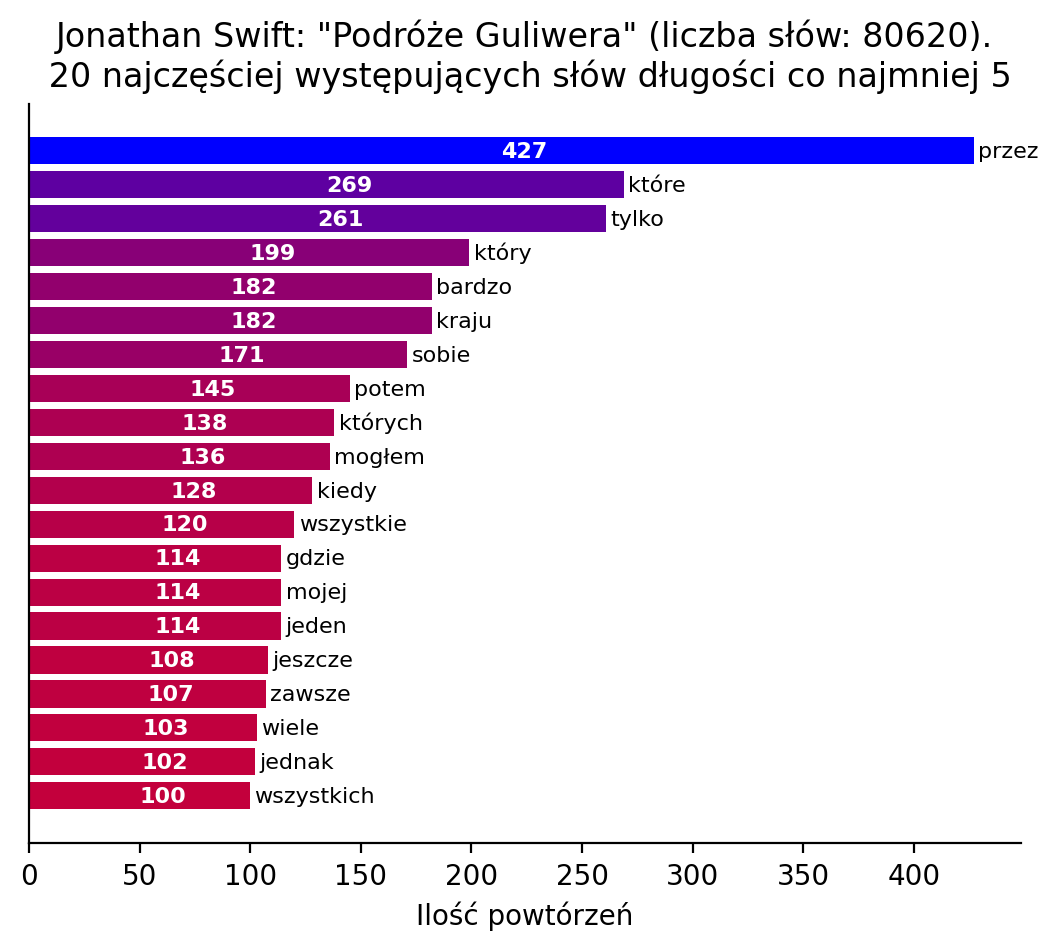

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def setcolor(maxvalue,value):
    code = 1 - value/maxvalue
    return((code,0,1-code))

plt.rcdefaults()
fig, ax = plt.subplots()

maxvalue = slowa5[0][1]

words = []
counts = []
yticklabels = []
colors = []
for i in range(len(slowa5) - 1, -1, -1):
    words.append(slowa5[i][0])
    counts.append(slowa5[i][1])
    yticklabels.append("")
    colors.append(setcolor(maxvalue,slowa5[i][1]))

ax.barh(words, counts, color=colors)

ax.set_xlabel('Ilość powtórzeń')
title = "Jonathan Swift: \"Podróże Guliwera\" (liczba słów: " + str(totalcount)+").\n 20 najczęściej występujących słów długości co najmniej 5"
ax.set_title(title)

ax.yaxis.set_ticks_position('none')
ax.set_yticklabels(yticklabels)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


i = 0
for i in range(len(ax.patches)):
    ax.patches[i].color = 'red'
    patch = ax.patches[i]
    plt.text(x=patch.get_width() + 2,
             y=patch.get_y() + 0.2,
             s=words[i],
             fontsize=8,
             fontweight='normal',
             color='black')
    plt.text(x=patch.get_width() / 2,
             y=patch.get_y() + 0.2,
             s=counts[i],
             fontsize=8,
             fontweight='bold',
             color='white')
    i = i + 1

plt.savefig('04_lew_275116.svg',dpi=300)
plt.show()